# Pytorch로 시작하는 딥러닝 Book Study
# (1주차) 10월13일
> 데이터 준비

### 스칼라(0차원 텐서)

In [11]:
import torch
import sklearn as sk
from sklearn.datasets import load_boston

In [12]:
x= torch.tensor(10)
print(x)
print(x.dim())

tensor(10)
0


### 벡터(1차원 텐서)

In [13]:
temp= torch.FloatTensor([1,2,3,4.7,5,6,7.0])
temp.size()

torch.Size([7])

### 행렬(2차원 텐서)

In [16]:
boston= load_boston()
boston_tensor = torch.from_numpy(boston.data)
boston_tensor.size()

torch.Size([506, 13])

In [26]:
print(boston_tensor.size())

torch.Size([506, 13])


### 3차원 텐서

In [48]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

dog = np.array(Image.open('dog.png').resize((224,224)))
dog_tensor =torch.from_numpy(dog)
dog_tensor.size()

torch.Size([224, 224, 3])

### 텐서 슬라이싱(텐서 자르기)

In [49]:
sales = torch.FloatTensor([1,2,3,4,5,6,7,8])

sales[:5]

tensor([1., 2., 3., 4., 5.])

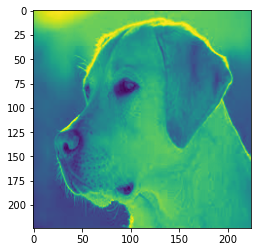

In [51]:
plt.imshow(dog_tensor[:,:,0].numpy())

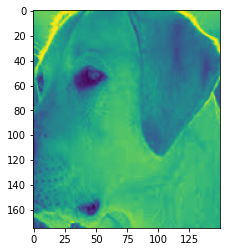

In [52]:
plt.imshow(dog_tensor[25:200,50:200,0].numpy())

In [53]:
sales= torch.eye(3,3)
sales[0,1]

tensor(0.)

### 4차원 텐서  >>>>>>> batch로 묶인 이미지들

- 강아지 사진 웹 크롤링

In [54]:
from fastai.data.all import *
from fastai.vision.all import * 

In [56]:
path=Path() # Path클래스에서 인스턴스생성 

In [60]:
mkdir dog_image

In [62]:
cd dog_image

C:\Users\user\dog_image


In [63]:
def search_images_ddg(key,max_n=200):
    """Search for 'key' with DuckDuckGo and return a unique urls of 'max_n' images
       (Adopted from https://github.com/deepanprabhu/duckduckgo-images-api)
    """
    url        = 'https://duckduckgo.com/'
    params     = {'q':key}
    res        = requests.post(url,data=params)
    searchObj  = re.search(r'vqd=([\d-]+)\&',res.text)
    if not searchObj: print('Token Parsing Failed !'); return
    requestUrl = url + 'i.js'
    headers    = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0'}
    params     = (('l','us-en'),('o','json'),('q',key),('vqd',searchObj.group(1)),('f',',,,'),('p','1'),('v7exp','a'))
    urls       = []
    while True:
        try:
            res  = requests.get(requestUrl,headers=headers,params=params)
            data = json.loads(res.text)
            for obj in data['results']:
                urls.append(obj['image'])
                max_n = max_n - 1
                if max_n < 1: return L(set(urls))     # dedupe
            if 'next' not in data: return L(set(urls))
            requestUrl = url + data['next']
        except:
            pass


In [64]:
search_images_ddg('dogs',max_n=200)

(#199) ['https://fetchmag.com/bringit/wp-content/uploads/2018/05/as.jpg','https://ssl.c.photoshelter.com/img-get/I0000WrF5u2T9EG4/s/1200/I0000WrF5u2T9EG4.jpg','https://sbly-web-prod-shareably.netdna-ssl.com/wp-content/uploads/2019/05/17195115/chain-1.jpg','https://images.wagwalkingweb.com/media/daily_wag/behavior_guides/hero/1535865878.25/why-do-dogs-move-their-tail.jpg','https://static2.therichestimages.com/wordpress/wp-content/uploads/2016/07/f5831004_194594462_0c22c2bee2_o.xxxlarge_2x.jpg','https://azdogsports.com/wp-content/uploads/2020/08/senior-dog-b-1.jpeg','https://www.healthypawspetinsurance.com/blog/wp-content/uploads/fat_dogs_640x420.jpg','http://www.toledoblade.com/image/2012/12/05/cT/Dogs-for-adoption-Menchi.jpg','https://www.luxurypuppies2u.com/wp-content/uploads/2019/11/iStock-601948714.jpg','https://images.wagwalkingweb.com/media/care/can-dogs-get-heartworm-while-on-preventative-medication/Can_Dogs_Get_Heartworm_While_On_Preventative_Medication.jpg'...]

In [65]:
download_images(path,urls=search_images_ddg('dogs',max_n=200))

In [67]:
cd ..

C:\Users\user


In [71]:
import glob

In [79]:
cd dog_image

C:\Users\user\dog_image


In [85]:
dogs= glob.glob('dog_image'+'*.jpg')
dog_imgs = np.array([np.array(Image.open(dog).resize((224,224))) for dog in dogs[:64]])

In [86]:
dog_imgs = dog_imgs.reshape(-1,224,224,3)
dog_tensor = torch.from_numpy(dog_imgs)
dog_tensor.size()

torch.Size([0, 224, 224, 3])

### 5차원 텐서 >>>>> 동영상 데이터

In [103]:
import time
start = time.time()

a= torch.rand(10000,10000)
b= torch.rand(10000,10000)
a.matmul(b)

print(time.time()-start)

3.1495461463928223


In [104]:
import time
start = time.time()

a= a.cuda()
b= b.cuda()

a.matmul(b)

print(time.time()-start)

3.0338807106018066


# Step1: 신경망에 사용할 데이터 생성

In [106]:
def get_data():
    train_X = np.asarray([1,2,3,4,5])
    train_Y = np.asarray([6,7,8,9,10])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype), requires_grad= False).view(5,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype), requires_grad= False).view(5,1)
    
    return X,y

# Step2: 학습 파라미터 생성

In [107]:
def get_weights():
    w= Valiable(torch.randn(1), requires_grad= True)
    b= Valiable(torch.randn(1), requires_grad= True)
    return w,b

# Step3: 네트워크

In [108]:
def simple_network():
    yhat = torch.matmul(x,w)+b
    return yhat

# Step4: 오차함수

In [109]:
def loss_fn():
    loss = (yhat-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    return loss.data[0]

# Step5: Optimizer

In [110]:
def optimizer(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

# Step6: 데이터 로딩

In [111]:
from torch.utils.data import Dataset

class DogsAndCatsDataset(Dataset):
    def __init__(self,root_dir,size=(224,224)):
        self.files = glob(root_dir)
        self.size = size
    
    def __len__(self):
        return len(self.files)
    
    def __getitem__(self,idx):
        img = np.asarray(Image.open(self.files[idx]).resize(self.size))
        label = self.files[idx].split('/')[-2]
        return img,label

# Step7: DataLoader 클래스 (데이터를 배치로 만들어주는 역할)

In [112]:
dls = DataLoader(dogsdset,batch_size=32,num_workers=2)

for imgs, labels in dataloaders:
    pass

NameError: name 'dogsdset' is not defined